In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [20]:
pd.set_option('future.no_silent_downcasting', True)
modeldata = pd.read_csv("iris.csv",low_memory=False) #load data

In [6]:
print(modeldata.head())
print(modeldata.tail())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
     sepal.length  sepal.width  petal.length  petal.width    variety
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica


In [9]:
print(f"Dataset contains {modeldata.shape[0]} rows and {modeldata.shape[1]} columns.\n")
modeldata.describe()

Dataset contains 150 rows and 5 columns.



,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
modeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#will try to predict variety using all the other columns. first check for null values
print(modeldata.isnull().sum())

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


In [25]:
modeldata['variety'], _ = pd.factorize(modeldata['variety'])
# Setosa = 0
# Versicolor = 1
# Virginica = 2

In [26]:
print(modeldata['variety'].describe())

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: variety, dtype: float64


In [27]:
y = modeldata['variety'] # the column that we are attempting to predict

In [28]:
X = modeldata[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']] # features used to predict

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split into training and testing sets

In [30]:
model = LinearRegression() # Create an instance of the LinearRegression model

In [31]:
model.fit(X_train, y_train) # Fit the model to the training data

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Value: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.03711379440797689
R-squared Value: 0.9468960016420045
Mean Absolute Error (MAE): 0.14637694965308531


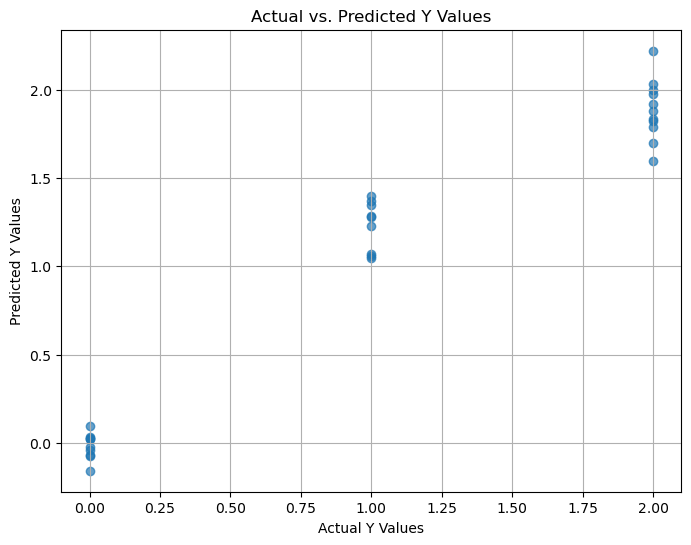

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Y Values")
plt.ylabel("Predicted Y Values")
plt.title("Actual vs. Predicted Y Values")
plt.grid(True)
plt.show()